# Set up the Notebook

Import our most used libraries

In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split

# Standard process of Machine learning

- Get a data set
- Split into training and test set
- Calling fit on the model
- Score with the test set

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(
    logreg.score(X_test, y_test)))

Test set score: 0.88


# Cross-Validation

Train the model multiple times on a different slice of data.

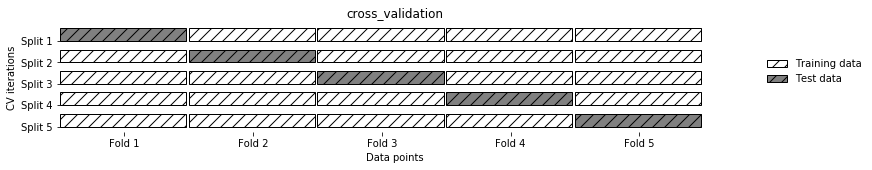

In [3]:
mglearn.plots.plot_cross_validation()

## Cross-Validation in scikit-learn

In `scikit-learn` we can use the `cross_val_score` function.

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.961 0.922 0.958]


## Update the number of folds

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [1.    0.967 0.933 0.9   1.   ]


Calculate the average of scores is an easy summary of cross validation accuracy

In [6]:
print("Average cross-validation score: {:.3f}".format(
    scores.mean()))

Average cross-validation score: 0.960


# Warning

Keep in mind, that cross-validation is not a way to build a model 
that can be applied to new data. It does not return a model.
Calling `cross_val_score` is a way to evaluate how well a given
algorithm will generalize and shows how sensitive this algorithm
is on the data selection.

# Stratified k-Fold Cross-Validation

Ensure that each class of observations from the whole data set
is represented in the same proportion in the training data set.

In [10]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


When doing cross-validation with 3 folds, the first split would 
contain all the '0' labels, the second one all the '1' labels, etc.

This is not really helpful, instead we use stratification.

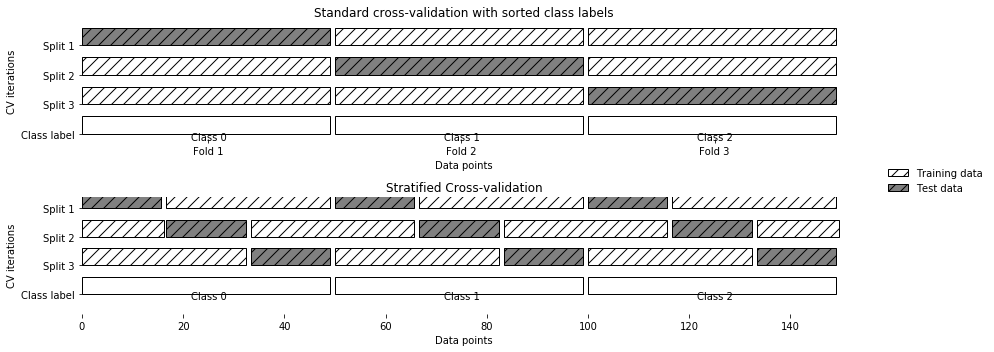

In [11]:
mglearn.plots.plot_stratified_cross_validation()

# Get more control over cross-validation

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    0.933 0.433 0.967 0.433]


In [15]:
kfold = KFold(n_splits=3)

print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [16]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


## Leave-one-out cross-validation

Here each fold is a single sample, i.e. each split is a single data point as the test set.
It is time consuming on large dataset, but can provide better estimates on small datasets.

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, 
                         iris.target, cv=loo)
print("Number of cv iterations: {}".format(len(scores)))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations: 150
Mean accuracy: 0.95


## Shuffle-split cross-validaton

Each split samples `train_size` many data points for the training set and `test_size` many disjoint data points for the test set for `n_iter` times.

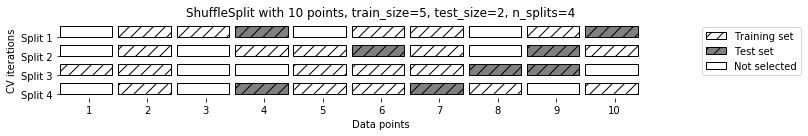

In [18]:
mglearn.plots.plot_shuffle_split()

In [20]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, 
                             train_size=.5, n_splits=10)
scores = cross_val_score(
    logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation-scores: \n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation-scores: 
[0.907 0.96  0.893 0.92  0.973 0.973 0.947 0.973 0.96  0.973]
Mean accuracy: 0.95


### Stratified version of ShuffleSplit

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(
    test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(
    logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation-scores: \n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation-scores: 
[0.947 0.88  0.947 0.893 0.92  0.96  0.947 0.947 0.96  0.933]
Mean accuracy: 0.93
